# Part II - Ford GoBike Data
## by Momen Ghulmi

## Investigation Overview

This analysis aims to address the primary question: How is the rental system being utilized? To achieve this, we explored several key inquiries, including: What is the typical duration of trips? On which days is the rental system most frequently used? Who are the primary users sharing all trip?

## Dataset Overview and Executive Summary
The dataset utilized for this analysis is the February 2019 dataset, which includes summary information about each trip, such as duration, start and end locations, and times. Additionally, it contains demographic information about users, including age and gender, as well as their user type (Subscriber or Regular Customer).

This document presents the following key findings from the analysis: 

- The majority of trips have a duration of less than 15 minutes, with trips exceeding 25 minutes being relatively rare.
- Weekend usage is significantly lower compared to weekdays, with Thursday experiencing the highest traffic, followed by Tuesday.
- All users who shared all trips are Subscribers, with no Regular Customers participating in all trip sharing.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data/clean/201902-fordgobike-tripdata_clean.csv')

## **1** Trips Duration
This Histogram plot depicts the distribution of trip duration. The distribution clearly shows most trips below 15 mins in duration, with very few being more than 25 minutes.



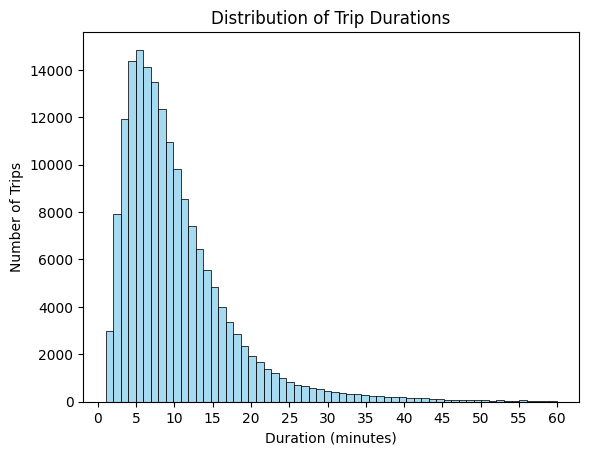

In [3]:
duration_min = df[df['duration_sec'] <= 3600]['duration_sec'] / 60
xticks = np.arange(0, 65, 5)
sns.histplot(duration_min, bins=60, color='skyblue')
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Trips')
plt.xticks(xticks);

## **2** Usage By Day
This bar chart illustrates the number of bike rentals for each day of the week. It clearly indicates that weekend days (Saturday and Sunday) experience the lowest rental usage. This trend suggests that the majority of bike rentals are likely utilized for commuting purposes during the workweek, highlighting the system's role in facilitating work-related travel.


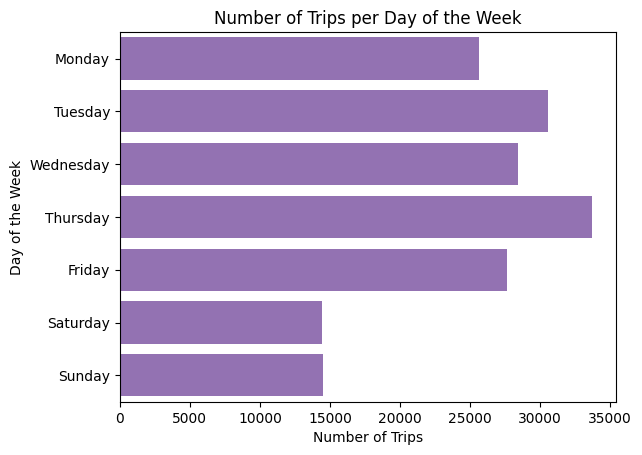

In [4]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_type = pd.CategoricalDtype(categories=days, ordered=True)
df['start_day'] = df['start_day'].astype(day_type)
sns.countplot(data=df, y='start_day', color='tab:purple')
plt.title('Number of Trips per Day of the Week')
plt.xlabel('Number of Trips')
plt.ylabel('Day of the Week');

## **3** Sharing All Trips per User Type
The following heatmap shows the relationship between user type and bike share for all trips. it clearly proves that all the user sharing all trips are Subscribers, with no Regular customers sharing all trips.


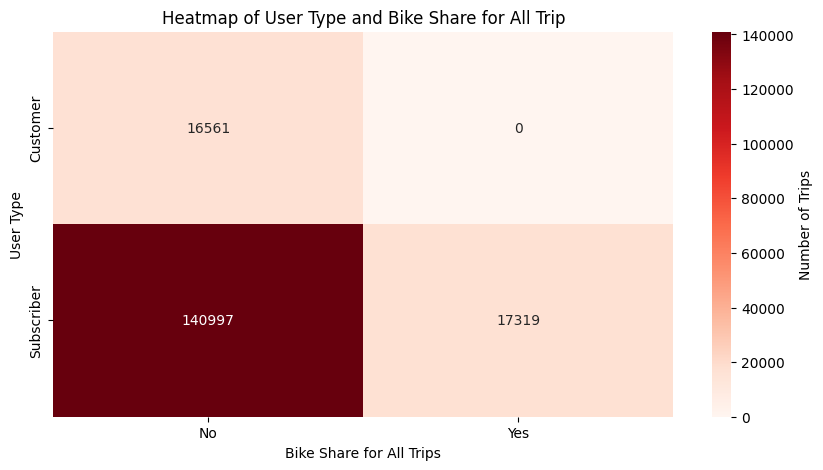

In [15]:
df_heatmap = df.groupby(['user_type', 'bike_share_for_all_trip'], observed=False).size().reset_index(name='count')
df_heatmap = df_heatmap.pivot(index='user_type', columns='bike_share_for_all_trip', values='count')
df_heatmap.fillna(0, inplace=True)
df_heatmap['No'] = df_heatmap['No'].astype(int)
df_heatmap['Yes'] = df_heatmap['Yes'].astype(int)

plt.figure(figsize=(10, 5))
sns.heatmap(df_heatmap, annot=True, fmt='d', cmap='Reds', cbar_kws={'label': 'Number of Trips'})
plt.xlabel('Bike Share for All Trips')
plt.ylabel('User Type')
plt.title('Heatmap of User Type and Bike Share for All Trip');